In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchsummary


from trainer import Trainer 
from tester import Tester
from utils import  visualize_data,show_misclassified_images,plot_class_distribution,plot_confusion_matrix,plot_curves
from dataloader import Cifar10DataLoader
from vistransformers import train_transforms,test_transforms
from model import Net,Network

In [3]:
torch.cuda.amp.autocast(enabled=True,dtype=torch.float16)
torch.set_float32_matmul_precision('medium')

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Is CUDA available? ", use_cuda)

Is CUDA available?  True


In [5]:
cifar10 = Cifar10DataLoader(is_cuda_available=use_cuda)

train_loader = cifar10.get_loader(transforms=train_transforms,train=True)
test_loader  = cifar10.get_loader(transforms=test_transforms,train=False) 

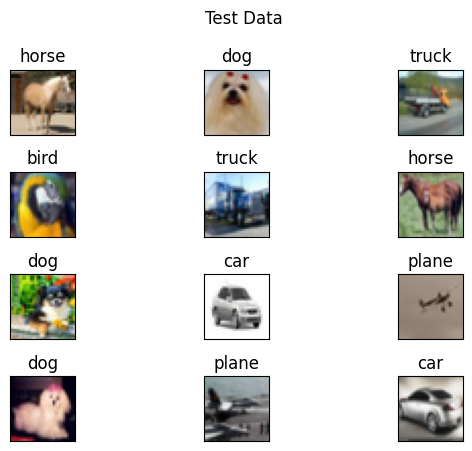

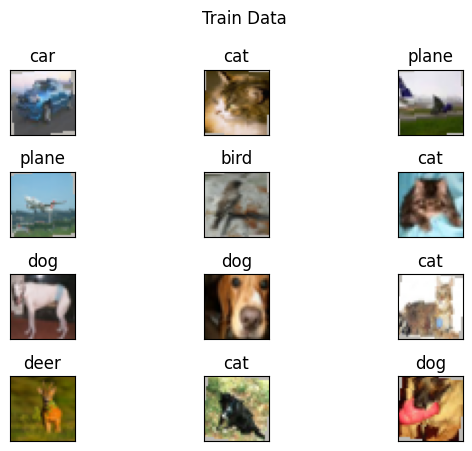

In [6]:
visualize_data(test_loader,12,"Test Data",classes=cifar10.classes)
visualize_data(train_loader,12,"Train Data",classes=cifar10.classes)

In [7]:
model = Network('layer')
torchsummary.summary(model=model.cuda(),input_size=(3,32,32),batch_size=-1,device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
         Dropout2d-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
        Dropout2d-14           [-1, 16,

EPOCH=1| LR=0.200000| LOSS=1.72| BATCH=390| ACCURACY=26.238: 100%|██████████| 391/391 [00:23<00:00, 16.66it/s]
LOSS=143.23| BATCH=78| ACCURACY=32.560: 100%|██████████| 79/79 [00:07<00:00, 10.29it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=2| LR=0.200000| LOSS=1.68| BATCH=390| ACCURACY=37.196: 100%|██████████| 391/391 [00:23<00:00, 16.97it/s]
LOSS=125.81| BATCH=78| ACCURACY=41.070: 100%|██████████| 79/79 [00:07<00:00, 10.51it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=3| LR=0.200000| LOSS=1.65| BATCH=390| ACCURACY=43.830: 100%|██████████| 391/391 [00:22<00:00, 17.04it/s]
LOSS=115.58| BATCH=78| ACCURACY=47.030: 100%|██████████| 79/79 [00:07<00:00, 10.57it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=4| LR=0.200000| LOSS=1.13| BATCH=390| ACCURACY=48.776: 100%|██████████| 391/391 [00:22<00:00, 17.13it/s]
LOSS=101.89| BATCH=78| ACCURACY=53.820: 100%|██████████| 79/79 [00:07<00:00, 10.56it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=5| LR=0.200000| LOSS=1.12| BATCH=390| ACCURACY=53.044: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s]
LOSS=92.02| BATCH=78| ACCURACY=57.420: 100%|██████████| 79/79 [00:07<00:00, 10.64it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=6| LR=0.200000| LOSS=1.33| BATCH=390| ACCURACY=56.522: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]
LOSS=86.17| BATCH=78| ACCURACY=60.520: 100%|██████████| 79/79 [00:07<00:00, 10.57it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=7| LR=0.200000| LOSS=1.29| BATCH=390| ACCURACY=59.064: 100%|██████████| 391/391 [00:22<00:00, 17.14it/s]
LOSS=83.05| BATCH=78| ACCURACY=61.970: 100%|██████████| 79/79 [00:07<00:00, 10.57it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=8| LR=0.200000| LOSS=0.94| BATCH=390| ACCURACY=60.946: 100%|██████████| 391/391 [00:22<00:00, 17.01it/s]
LOSS=78.91| BATCH=78| ACCURACY=64.110: 100%|██████████| 79/79 [00:07<00:00, 10.54it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=9| LR=0.200000| LOSS=0.97| BATCH=390| ACCURACY=62.382: 100%|██████████| 391/391 [00:23<00:00, 16.40it/s]
LOSS=80.35| BATCH=78| ACCURACY=63.710: 100%|██████████| 79/79 [00:07<00:00, 10.80it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=10| LR=0.200000| LOSS=1.02| BATCH=390| ACCURACY=64.274: 100%|██████████| 391/391 [00:22<00:00, 17.18it/s]
LOSS=78.40| BATCH=78| ACCURACY=64.830: 100%|██████████| 79/79 [00:07<00:00, 10.81it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=11| LR=0.200000| LOSS=1.00| BATCH=390| ACCURACY=65.008: 100%|██████████| 391/391 [00:22<00:00, 17.28it/s]
LOSS=75.44| BATCH=78| ACCURACY=66.110: 100%|██████████| 79/79 [00:07<00:00, 10.78it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=12| LR=0.200000| LOSS=1.04| BATCH=390| ACCURACY=66.344: 100%|██████████| 391/391 [00:22<00:00, 17.28it/s]
LOSS=71.62| BATCH=78| ACCURACY=68.070: 100%|██████████| 79/79 [00:07<00:00, 10.33it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=13| LR=0.200000| LOSS=0.75| BATCH=390| ACCURACY=67.272: 100%|██████████| 391/391 [00:26<00:00, 14.74it/s]
LOSS=71.24| BATCH=78| ACCURACY=68.130: 100%|██████████| 79/79 [00:07<00:00, 10.38it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=14| LR=0.200000| LOSS=0.67| BATCH=390| ACCURACY=68.306: 100%|██████████| 391/391 [00:25<00:00, 15.16it/s]
LOSS=70.30| BATCH=78| ACCURACY=68.710: 100%|██████████| 79/79 [00:07<00:00, 10.21it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=15| LR=0.200000| LOSS=0.75| BATCH=390| ACCURACY=68.902: 100%|██████████| 391/391 [00:23<00:00, 16.75it/s]
LOSS=67.62| BATCH=78| ACCURACY=70.010: 100%|██████████| 79/79 [00:07<00:00, 10.58it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=16| LR=0.200000| LOSS=1.04| BATCH=390| ACCURACY=69.438: 100%|██████████| 391/391 [00:23<00:00, 16.70it/s]
LOSS=65.81| BATCH=78| ACCURACY=70.570: 100%|██████████| 79/79 [00:07<00:00, 10.28it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=17| LR=0.200000| LOSS=0.74| BATCH=390| ACCURACY=70.420: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
LOSS=62.81| BATCH=78| ACCURACY=72.200: 100%|██████████| 79/79 [00:07<00:00,  9.95it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=18| LR=0.200000| LOSS=0.64| BATCH=390| ACCURACY=70.840: 100%|██████████| 391/391 [00:24<00:00, 15.95it/s]
LOSS=64.58| BATCH=78| ACCURACY=71.200: 100%|██████████| 79/79 [00:07<00:00, 10.44it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=19| LR=0.200000| LOSS=0.73| BATCH=390| ACCURACY=71.266: 100%|██████████| 391/391 [00:24<00:00, 15.98it/s]
LOSS=61.96| BATCH=78| ACCURACY=72.530: 100%|██████████| 79/79 [00:07<00:00, 10.43it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=20| LR=0.200000| LOSS=0.84| BATCH=390| ACCURACY=71.566: 100%|██████████| 391/391 [00:24<00:00, 15.93it/s]
LOSS=62.26| BATCH=78| ACCURACY=72.350: 100%|██████████| 79/79 [00:07<00:00, 10.66it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


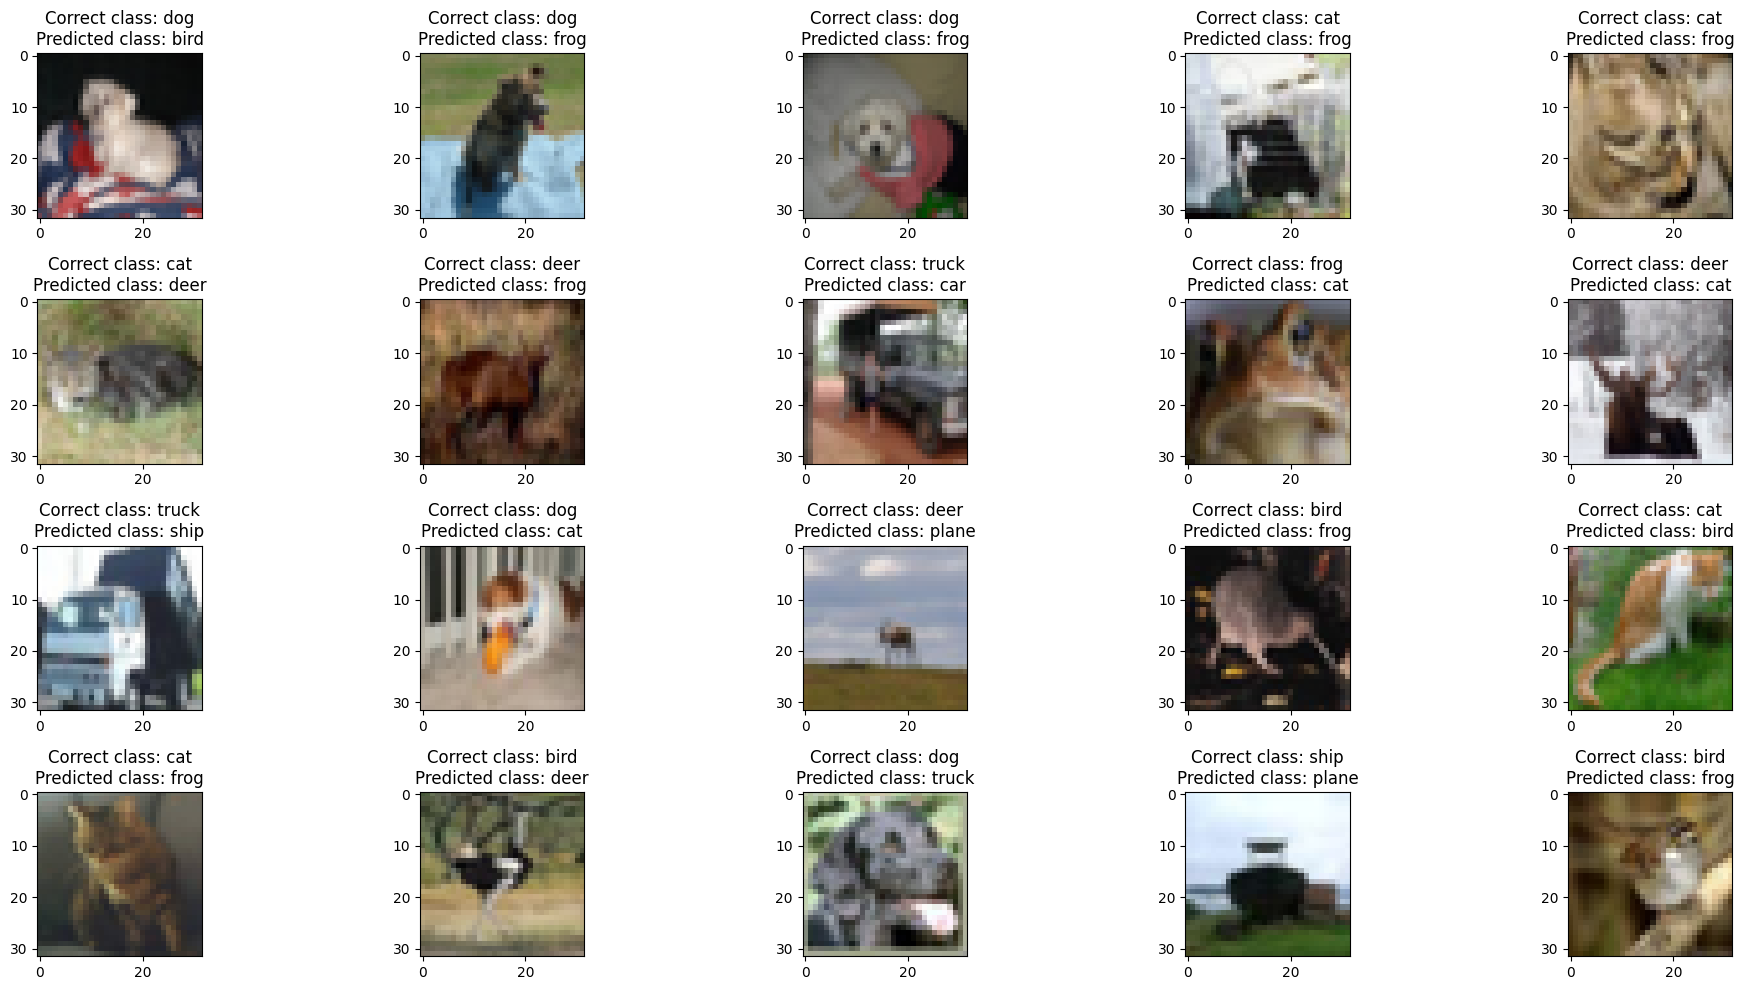

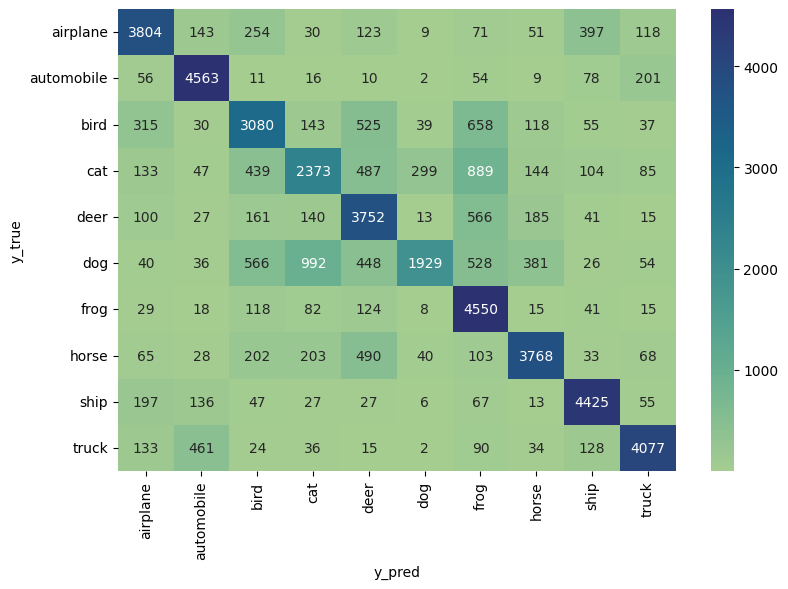

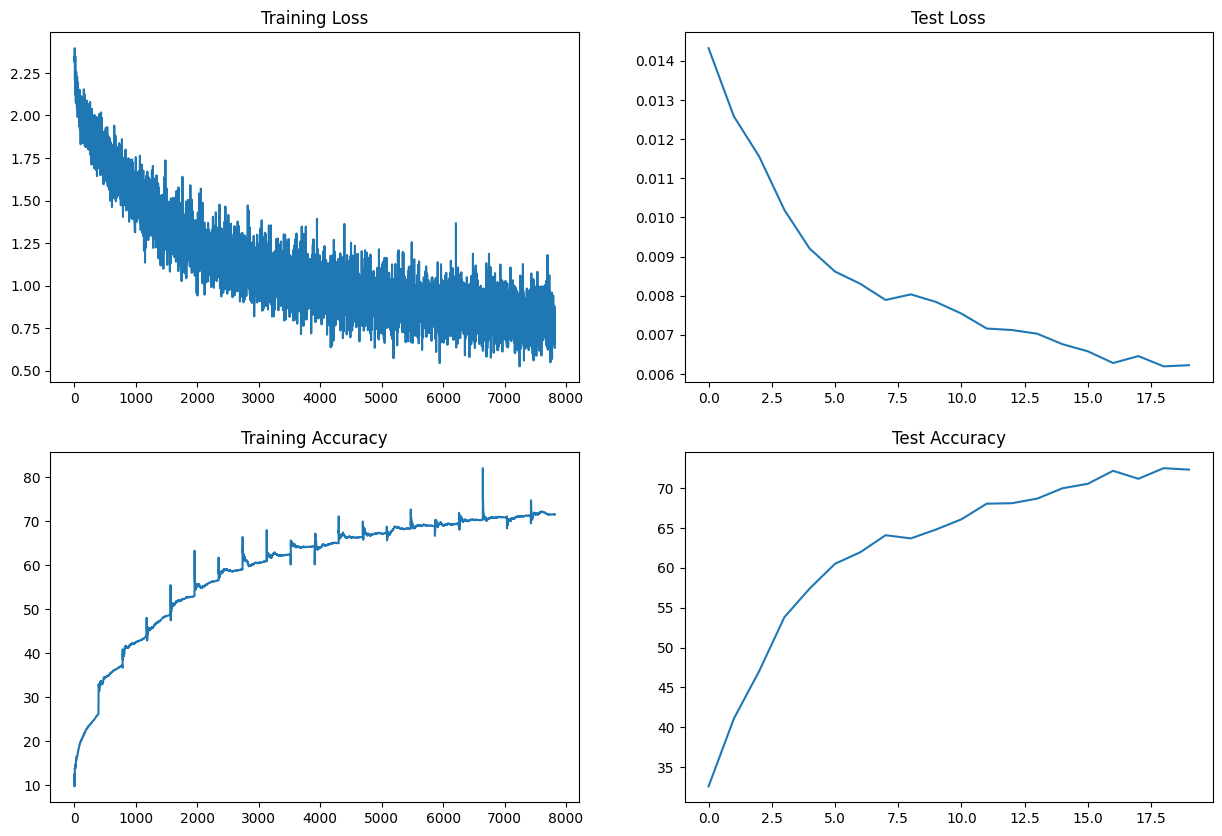

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,mode='min',factor=0.1,patience=5)
criterion = nn.NLLLoss()


trainer = Trainer(model, train_loader, optimizer, criterion, device)
tester = Tester(model, test_loader, criterion, device)

for epoch in range(1, 21):
    trainer.train(epoch=epoch)
    _,test_loss = tester.test()
    scheduler.step(test_loss)
    print('-'*200)


misclassified_images, predictions, labels = tester.get_misclassified_images()

show_misclassified_images(
    misclassified_images[:20],
    predictions[:20],
    labels[:20],
    cifar10.classes,
);

plot_confusion_matrix(model,train_loader,'cuda',train_loader.dataset.classes);

plot_curves(trainer.train_losses,trainer.train_accuracies,tester.test_losses,tester.test_accuracies);

In [9]:
torch.save(model.state_dict(),'./assets/LN/modelBN.pth')

In [10]:
torch.save(optimizer.state_dict(),'./assets/LN/optimBN.pth')